In [1]:
## imports dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## reads data file into python
data_file_path = os.path.join('..', 'raw_data', 'team_game_level_data.csv')
team_game_df = pd.read_csv(data_file_path)


In [3]:
## filter team_game_df down to just winners
winner_df = team_game_df[team_game_df['win'] == 1].copy()
winner_df['seed_diff'] = winner_df['seed'] - winner_df['opponent_seed']
winner_df

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,win,seed_id,seed_diff
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1,1_16_fav,-15
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,1,4_13_fav,-9
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,1,5_12_fav,-7
7,3,1985-03-14,Round of 64,East,8,Temple,60,9,Virginia Tech,57,NaN,3,1,8_9_fav,-1
9,4,1985-03-14,Round of 64,Midwest,1,Oklahoma,96,16,North Carolina A&T,83,NaN,13,1,1_16_fav,-15
11,5,1985-03-14,Round of 64,Midwest,4,Ohio State,75,13,Iowa State,64,NaN,11,1,4_13_fav,-9
12,6,1985-03-14,Round of 64,Midwest,5,Louisiana Tech,78,12,Pittsburgh,54,NaN,24,1,5_12_fav,-7
15,7,1985-03-14,Round of 64,Midwest,9,Illinois State,58,8,Southern California,55,NaN,3,1,8_9_dog,1
17,8,1985-03-14,Round of 64,Southeast,2,North Carolina,76,15,Middle Tennessee State,57,NaN,19,1,2_15_fav,-13
19,9,1985-03-14,Round of 64,Southeast,3,Kansas,49,14,Ohio,38,NaN,11,1,3_14_fav,-11


In [4]:
## Function to create scatter
def create_all_games_scatter(winner_df, title):
    plt.scatter(winner_df['seed_diff'], winner_df['score_diff'])
    plt.xlabel('seed diff')
    plt.ylabel('point diff')
    plt.title(title)


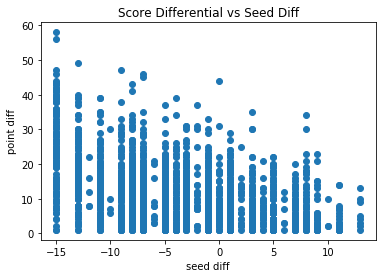

In [5]:
## basic all games scatter
title = 'Score Differential vs Seed Diff'
create_all_games_scatter(winner_df, title)
plt.show()

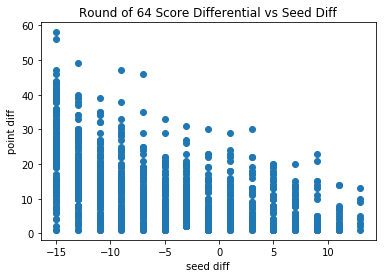

In [6]:
## basic round 64 scatter
round_64_winner_df = winner_df[winner_df['round'] == 'Round of 64']
round_64_scatter_title = 'Round of 64 Score Differential vs Seed Diff'
create_all_games_scatter(round_64_winner_df, round_64_scatter_title)
plt.show()

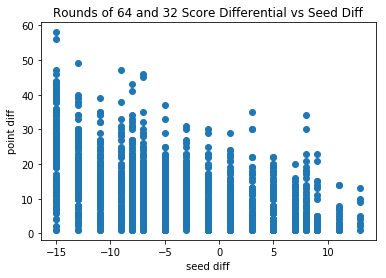

In [7]:
## basic round 64 or 32 scatter
rounds_64_32_winner_df = winner_df[winner_df['round'].isin(['Round of 64', 'Round of 32'])]
rounds_64_32_scatter_title = 'Rounds of 64 and 32 Score Differential vs Seed Diff'
create_all_games_scatter(rounds_64_32_winner_df, rounds_64_32_scatter_title)
plt.show()

In [8]:
def create_score_diff_average_scatter(winner_df, title):
    seed_diff_groupby = winner_df[['seed_diff', 'score_diff']].groupby('seed_diff')
    mean_seed_score_df = seed_diff_groupby.agg('mean')
    mean_seed_score_df.reset_index(inplace=True)
    plt.scatter(mean_seed_score_df['seed_diff'], mean_seed_score_df['score_diff'])
    plt.xlabel('seed diff')
    plt.ylabel('average point diff')
    plt.title(title)


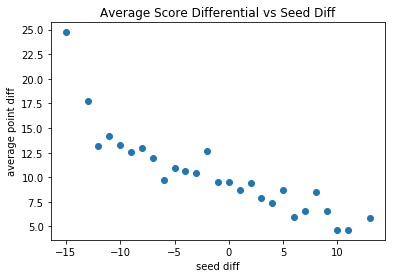

In [9]:
title = 'Average Score Differential vs Seed Diff'
create_score_diff_average_scatter(winner_df, 'Average Score Differential vs Seed Diff')
plt.show()

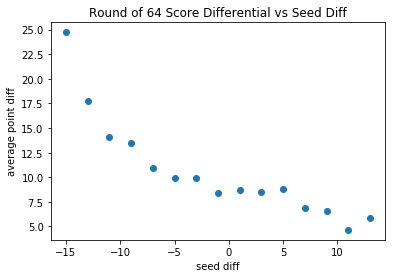

In [10]:
round_64_winner_df = winner_df[winner_df['round'] == 'Round of 64']
round_64_scatter_title = 'Round of 64 Score Differential vs Seed Diff'
create_score_diff_average_scatter(round_64_winner_df, round_64_scatter_title)
plt.show()

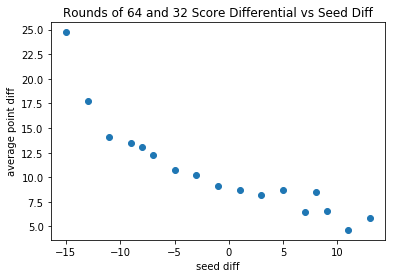

In [11]:
rounds_64_32_winner_df = winner_df[winner_df['round'].isin(['Round of 64', 'Round of 32'])]
rounds_64_32_scatter_title = 'Rounds of 64 and 32 Score Differential vs Seed Diff'
create_score_diff_average_scatter(rounds_64_32_winner_df, rounds_64_32_scatter_title)
plt.show()